### Pandas를 이용한 시각화
- matplotlib을 이용한 시각화: 여러 옵션들을 설정해서 직접 그려볼 수 있음(커스터마이징에 용이)
- pandas, seaborn를 이용한 시각화: 손쉽게 차트를 그려볼 수 있음

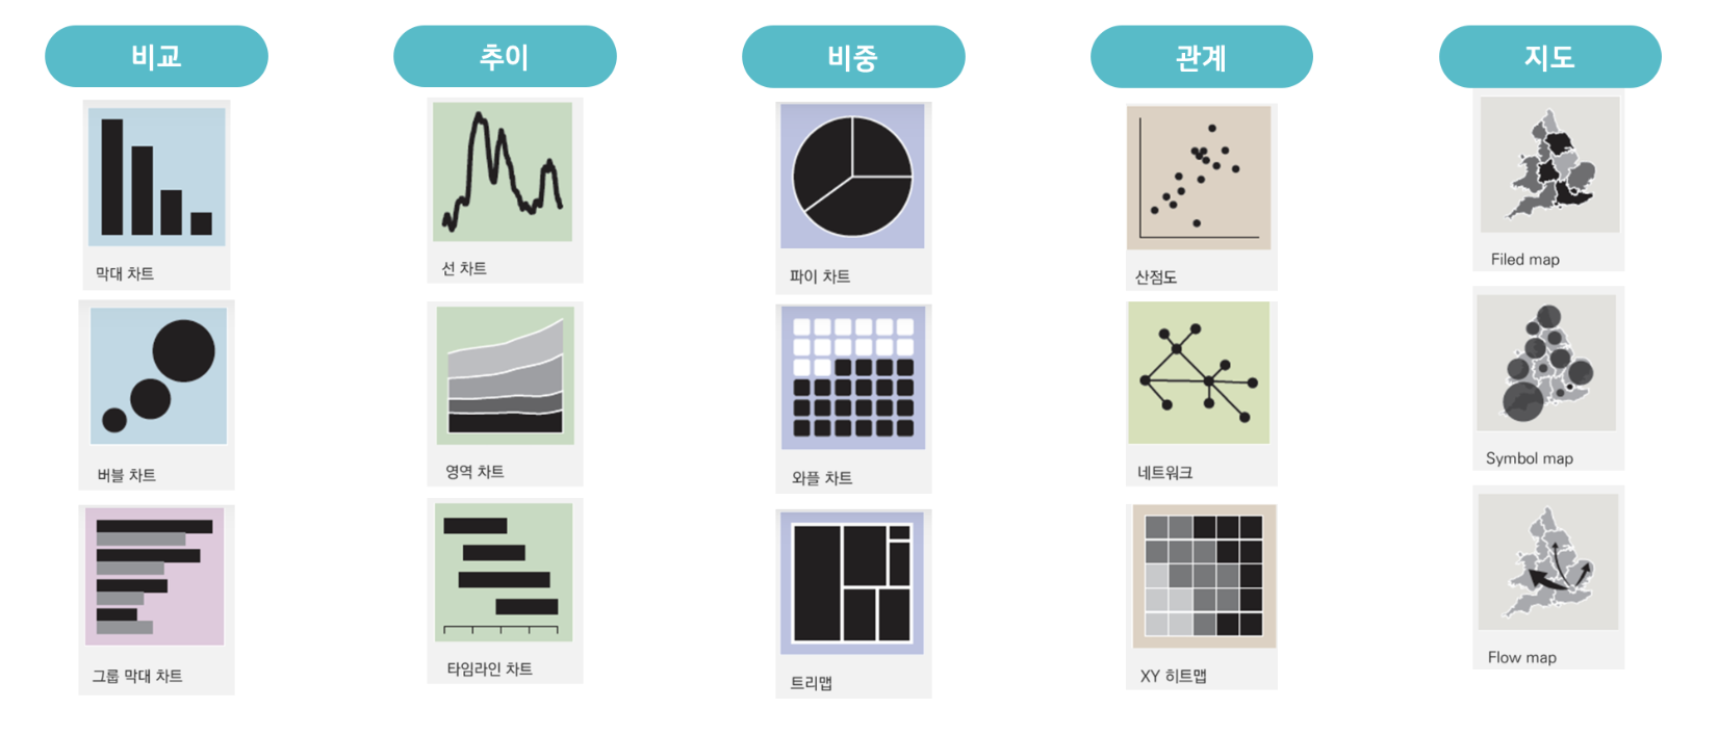

### 1. line chart
연도별 입사자 추세 확인하기

In [276]:
import pandas as pd

In [11]:
# hr 데이터 

hr_info = pd.read_csv('data/hr-info.csv', encoding = 'euc-kr', parse_dates = ['HIRE_DATE'])
# parse_dates: 날짜 타입으로 변환할 컬럼 설정
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [13]:
# 입사 연도 추출
hr_info['HIRE_DATE'].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [21]:
# 입사년도라는 새로운 컬럼 추가
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005


In [31]:
# 연도별 입사자 수 파악
hr_info['HIRE_YEAR'].value_counts().sort_index()

HIRE_YEAR
1999     1
2000     1
2002     1
2004     4
2005     4
2006     4
2010     7
2011     7
2012     8
2015    12
2016    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

<Axes: xlabel='HIRE_DATE', ylabel='HIRE_COUNT'>

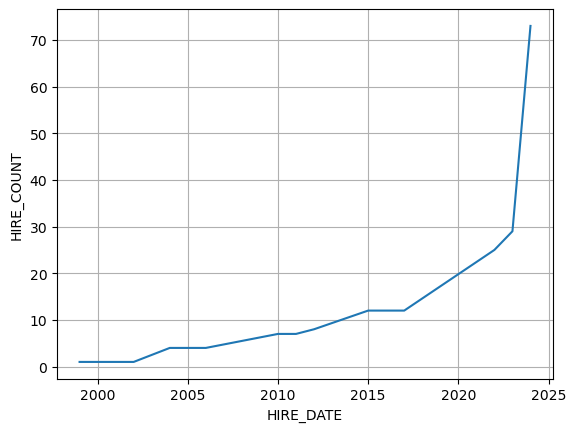

In [39]:
# 연도별로 입사자 수 선그래프로 파악하기
hr_info['HIRE_YEAR'].value_counts().sort_index().plot(kind = 'line', # 그래프 종류
                                                      xlabel = 'HIRE_DATE',
                                                      ylabel = 'HIRE_COUNT',
                                                      grid = True
                                                     )

### 2. bar chart

In [65]:
# 한글 폰트 적용
import matplotlib.pyplot as plt
plt.rc('font', family = 'Pretendard')

#### 학위별 평균 연봉 비교

In [59]:
hr_info[['SALARY','EDU_LEVEL']].groupby('EDU_LEVEL').mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


<Axes: xlabel='EDU_LEVEL'>

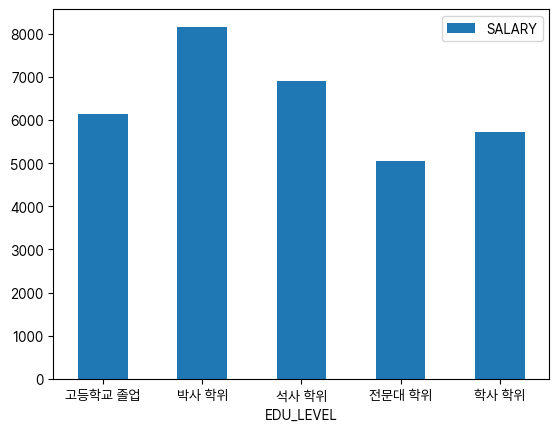

In [75]:
# 데이터 집계 및 시각화
hr_info[['SALARY','EDU_LEVEL']].groupby('EDU_LEVEL').mean().plot(kind = 'bar', rot = 0)

#### 학위, 성별에 따른 평균 연봉 시각화

In [80]:
hr_info[['GENDER', 'SALARY', 'EDU_LEVEL']].groupby(['EDU_LEVEL', 'GENDER']).mean()

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

<Axes: xlabel='EDU_LEVEL,GENDER'>

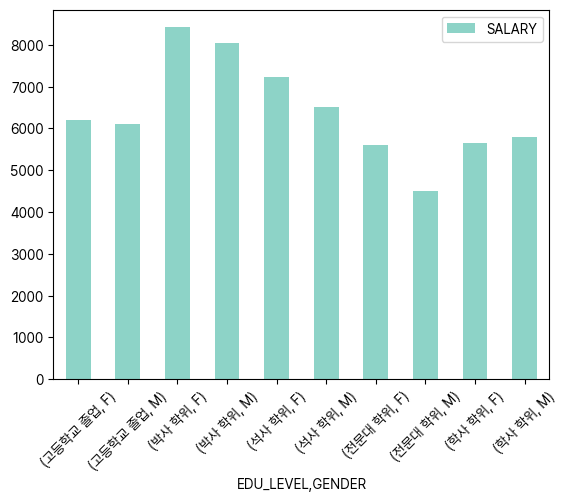

In [128]:
hr_info[['GENDER', 'SALARY', 'EDU_LEVEL']].groupby(['EDU_LEVEL', 'GENDER']).mean().plot(kind = 'bar',
                                                                                       colormap = 'Set3',
                                                                                        rot = 45
                                                                                       )

### 재구조화

In [135]:
salary_mean = hr_info[['GENDER', 'SALARY', 'EDU_LEVEL']].groupby(['EDU_LEVEL', 'GENDER']).mean().round(1)
salary_mean

SALARY
EDU_LEVEL GENDER        
고등학교 졸업   F       6200.0
          M       6100.0
박사 학위     F       8425.0
          M       8037.5
석사 학위     F       7233.3
          M       6525.0
전문대 학위    F       5600.0
          M       4500.0
학사 학위     F       5643.1
          M       5785.1

In [137]:
# 인덱스를 숫자로
salary_mean.reset_index()

,EDU_LEVEL,GENDER,SALARY
0,고등학교 졸업,F,6200.0
1,고등학교 졸업,M,6100.0
2,박사 학위,F,8425.0
3,박사 학위,M,8037.5
4,석사 학위,F,7233.3
5,석사 학위,M,6525.0
6,전문대 학위,F,5600.0
7,전문대 학위,M,4500.0
8,학사 학위,F,5643.1
9,학사 학위,M,5785.1


<Axes: title={'center': '교육 수준과 성별에 따른 평균 연봉 비교'}, xlabel='평균 연봉', ylabel='교육 수준'>

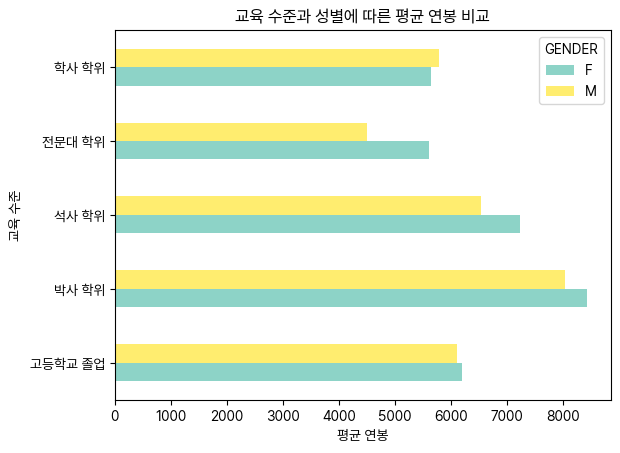

In [155]:
# 데이터 재구조화
salary_mea2 = salary_mean.reset_index().pivot(index = 'EDU_LEVEL', columns = 'GENDER', values = 'SALARY')
# barh: 막대그래프(수평)
salary_mea2.plot(kind = 'barh', colormap = 'Set3', xlabel = '평균 연봉', ylabel = '교육 수준', title = '교육 수준과 성별에 따른 평균 연봉 비교')

array([<Axes: title={'center': 'F'}, xlabel='평균 연봉', ylabel='교육 수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균 연봉', ylabel='교육 수준'>],
      dtype=object)

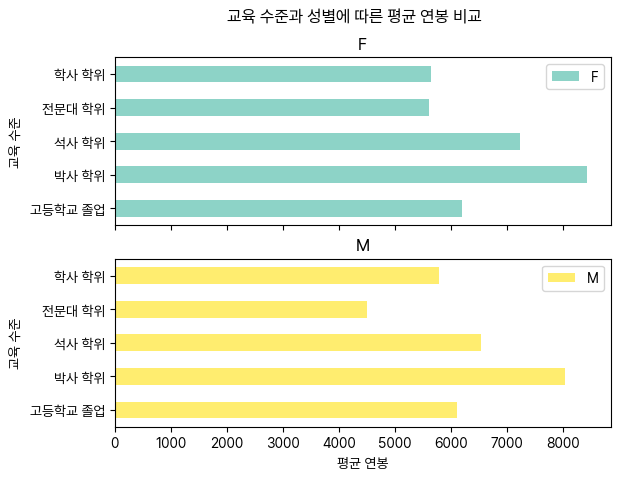

In [157]:
# 데이터 재구조화
salary_mea2 = salary_mean.reset_index().pivot(index = 'EDU_LEVEL', columns = 'GENDER', values = 'SALARY')
# barh: 막대그래프(수평)
salary_mea2.plot(kind = 'barh', colormap = 'Set3', xlabel = '평균 연봉', ylabel = '교육 수준', title = '교육 수준과 성별에 따른 평균 연봉 비교', subplots = True)

#### 팀별 평균 연봉 비교하기

In [162]:
# 조직 정보 데이터 로딩
org_info = pd.read_csv('data/org-info.csv', encoding = 'euc-kr')
org_info.head()

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
2,ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
3,ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
4,ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.


In [170]:
# 조직 정보(org_info)와 인사 정보(hr_info)를 merge
# 팀별 평균 연봉을 구하는 것이 목적 -> 팀정보는 조직 df, 연봉 정보는 인사 df에 있음
# ORG_CD(조직 번호)를 중심으로 진행
org_hr_merge = pd.merge(hr_info, org_info, on = 'ORG_CD')
org_hr_merge.shape # ceo, 사장, 부사장은 조직 정보가 없어서 사라짐(결측치)

(197, 28)

In [186]:
org_hr_merge.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,NATION,ROUNDING_DEDUCTION,HIRE_YEAR,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,KOREA,Y,2006,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
1,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,KOREA,Y,2005,Production Engineering Research Institute,생산기술원,Production Technology Development Team,생산기술개발팀,Advanced Manufacturing Team,첨단 제조 팀,첨단 제조 기술 개발 및 생산성 향상 작업을 수행합니다.
2,E00242,규모사,M,ORG027,P004,47,18,학사 학위,2.22,8300,...,KOREA,Y,2006,Human Resources,HR,Chief Human Resources Officer Department,최고인사책임자(CHO) 부서,Compensation and Benefits Team,보상 및 복리후생 팀,직원 보상 및 복리후생 제도 관리.
3,E00298,포난서,F,ORG021,P004,47,19,석사 학위,3.63,8500,...,KOREA,Y,2005,Business Solutions Division,BS사업본부,North America Innovation Center,북미이노베이션센터,North America Sales Team,북미 판매 팀,북미 지역 판매 전략 수립 및 실행을 담당합니다.
4,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,...,Japan,Y,2004,Home Appliance and Air Solution Division,HA사업본부,Kitchen Solutions Department,키친솔루션사업부,Kitchen Product Marketing Team,주방 제품 마케팅 팀,주방 제품의 마케팅 전략 수립 및 실행을 담당합니다.


In [176]:
org_hr_merge['KOR_TEAM']

0      글로벌 판매 전략 팀
1          첨단 제조 팀
2      보상 및 복리후생 팀
3          북미 판매 팀
4      주방 제품 마케팅 팀
          ...     
192    주방 제품 마케팅 팀
193     기술 영업 지원 팀
194     생산 품질 관리 팀
195        고객 통찰 팀
196     TV 고객 지원 팀
Name: KOR_TEAM, Length: 197, dtype: object

In [178]:
org_hr_merge['KOR_TEAM'].value_counts()

KOR_TEAM
북미 판매 팀              12
첨단 제조 팀              12
webOS 핵심 개발 팀        11
정보관리팀                10
인도 시장 분석 팀           10
혁신 연구 팀              10
인도 B2B 판매 팀           8
인재 채용 팀               8
주방 가전 개발 팀            8
webOS 사용자 인터페이스 팀     8
주방 제품 마케팅 팀           8
보상 및 복리후생 팀           7
글로벌 판매 전략 팀           7
webOS 품질 보증 팀         6
TV 제품 관리 팀            6
인도 고객 지원 팀            6
프로젝트 관리 팀             5
기술 영업 지원 팀            5
직원 개발 팀               5
생산 품질 관리 팀            5
TV 고객 지원 팀            5
주요 고객 관리 팀            5
고객 통찰 팀               5
생산 공정 개선 팀            4
부품개발팀                 4
분석팀                   4
TV 마케팅 팀              4
아시아 지역 판매 팀           3
신사업 개발 팀              3
주방 고객 서비스 팀           3
Name: count, dtype: int64

In [ ]:
# 1. 팀 별 평균 연봉 구하기(KOR_TEAM 별)
# 2. 막대그래프로 시각화

<Axes: xlabel='KOR_TEAM'>

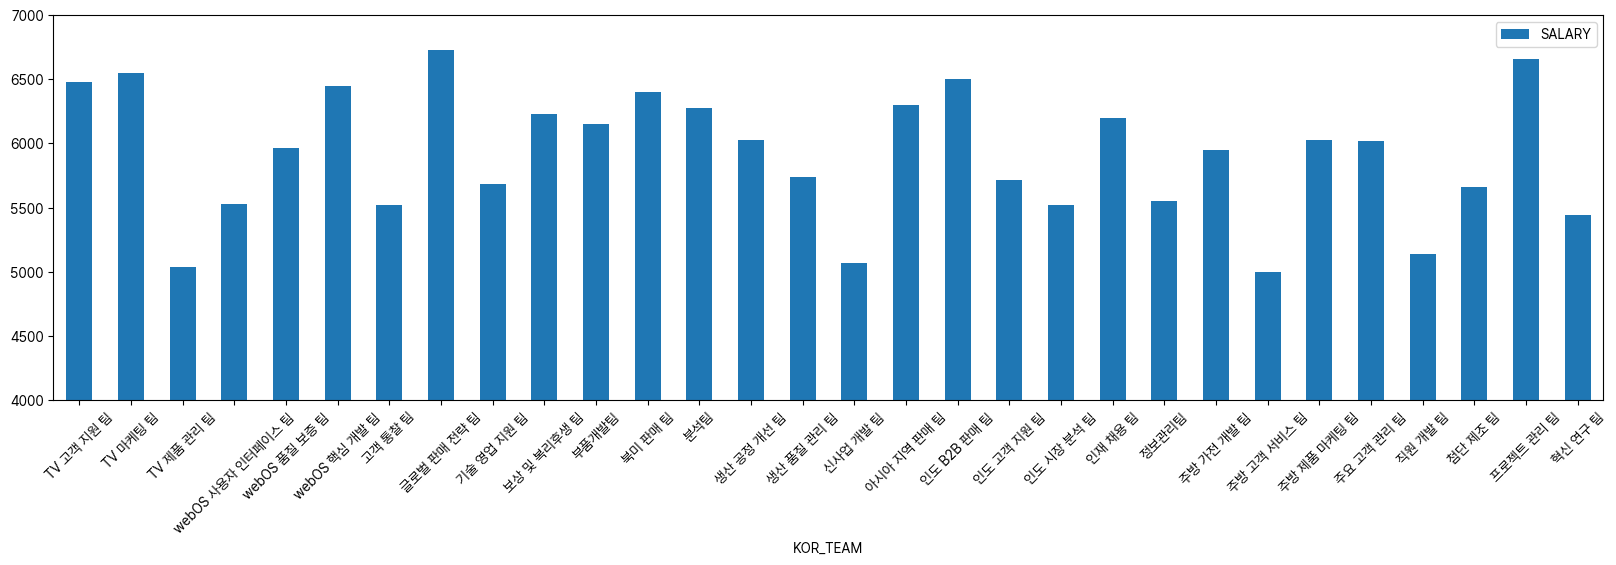

In [224]:
team_salary_mean = org_hr_merge[['KOR_TEAM', 'SALARY']].groupby('KOR_TEAM').mean()
team_salary_mean.plot(kind = 'bar', figsize = (20, 5), rot = 45, ylim = (4000, 7000))

<Axes: xlabel='KOR_DEPARTMENT'>

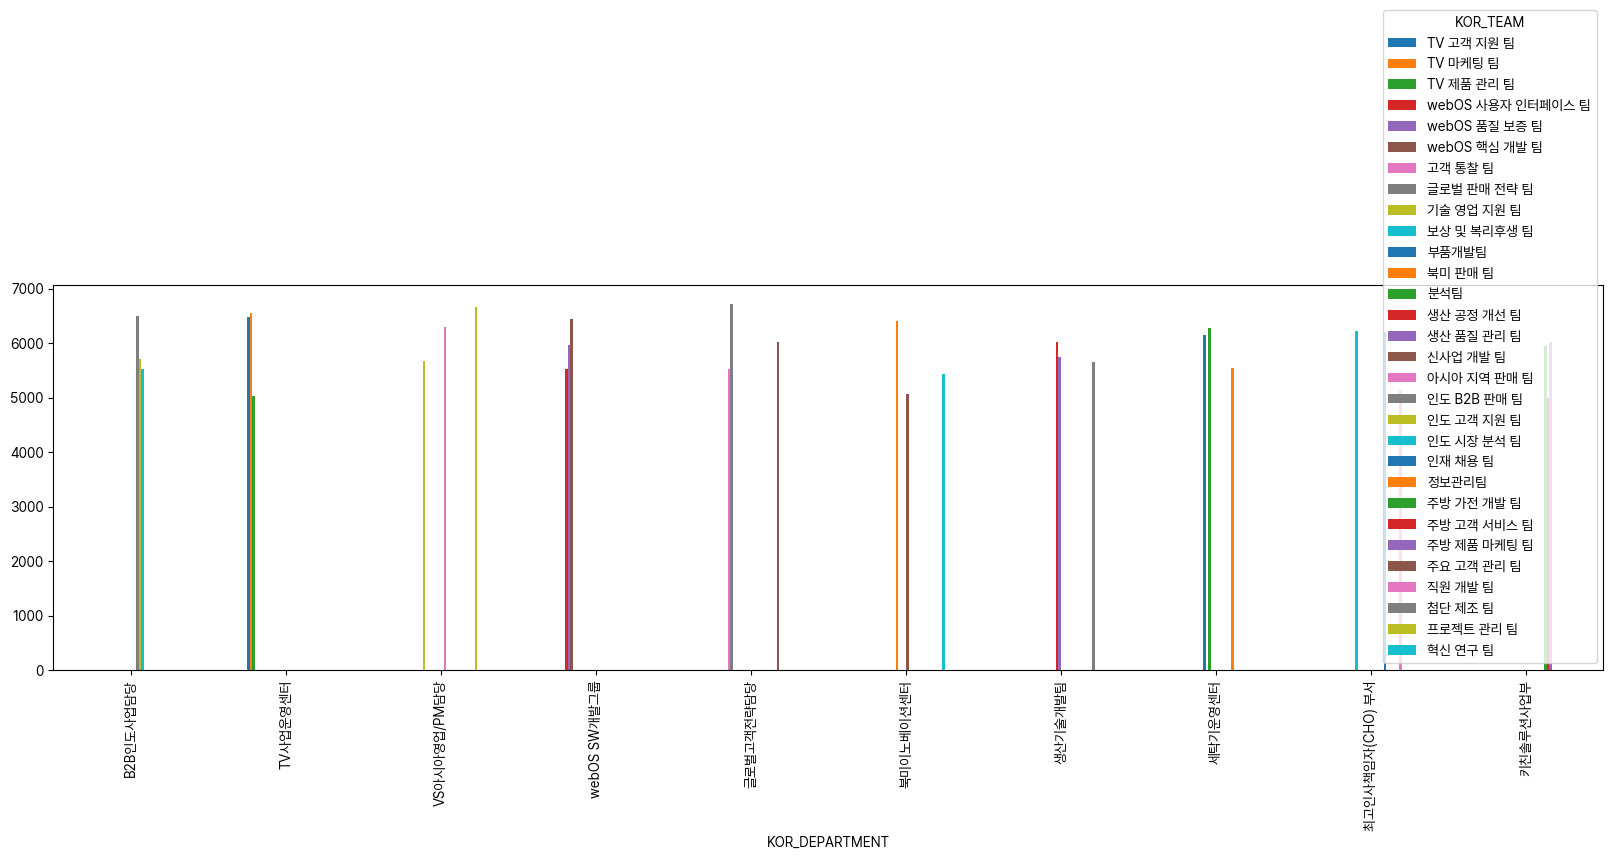

In [226]:
team_salary_mean = org_hr_merge[['KOR_TEAM', 'SALARY', 'KOR_DEPARTMENT']].groupby(['KOR_DEPARTMENT', 'KOR_TEAM']).mean()
team_salary_mean.reset_index().pivot(index = 'KOR_DEPARTMENT', columns = 'KOR_TEAM', values = 'SALARY').plot(kind = 'bar', figsize = (20, 5))

### 3. pie chart
- values
  - 원 그래프에 들어갈 데이터
- labels
  - 원 그래프 바깥에 표시되는 데이터의 이름
- autopct
  - 소수점 자리 표시 설정
  - %.1f%% -> %로 표시하는데 소수점 첫째자리까지, 뒤에는 % 기호 붙이기
- startangle
  - 원 그래프에서 첫 데이터 시작 위치를 설정
  - 보통은 90으로 사용 -> 원그래프에서 첫 시작을 12시를 기준으로 사용
- counterclock
  - False -> 원 그래프 출력을 시계방향으로(보통 이걸로 사용)
  - Ture -> 원 그래프 출력을 반시계 방향으로

각 부서별 인원수 확인

<Axes: title={'center': '각 본부의 인원비율'}, ylabel=' '>

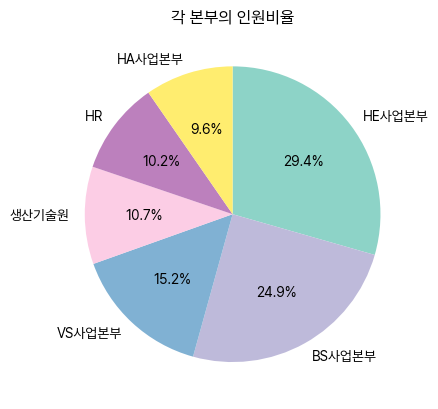

In [261]:
org_hr_merge['KOR_DIVISION'].value_counts().plot(kind = 'pie',
                                                 startangle = 90, # 12시 방향에서 시작
                                                 counterclock = False, # 시계 방향
                                                 autopct = '%.1f%%', # 소수점 표시
                                                 ylabel = ' ',
                                                 title = '각 본부의 인원비율',
                                                 colormap = 'Set3'
                                                )

### 4. scatter(산점도)

나이에 따른 연봉의 변화

<Axes: xlabel='AGE', ylabel='SALARY'>

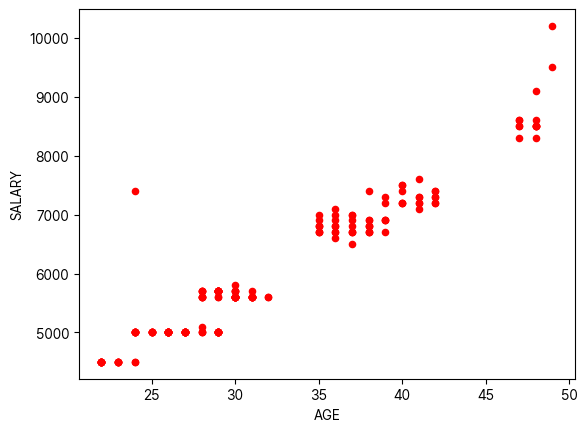

In [273]:
hr_info.plot(kind = 'scatter', x = 'AGE', y ='SALARY', color = 'red')

### Seaborn 패키지를 이용한 차트
- matplotlib을 기반으로 하는 데이터 시각화 도구
- 다양한 형태의 그래프를 손쉽게 활용가능
- 사용하기 편함

#### 1. 히스토그램

성별에 따른 연봉 히스토그램

In [282]:
import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

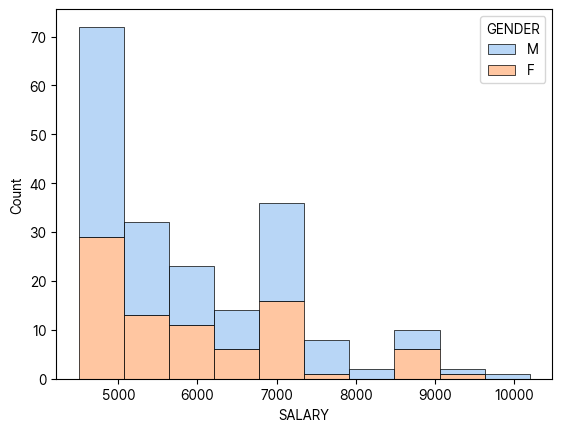

In [298]:
sns.histplot( # Seaborn의 히스토그램을 생성하는 함수
    hr_info, # 사용할 데이터
    x = 'SALARY',
    hue = 'GENDER',
    multiple = 'stack', # 막대를 쌓아서 그룹별 분포를 표시, 기본값은 두개의 값을 곂쳐서 표시
    palette = 'pastel', # pastel, husl, muted, Set2, coolwarm
    linewidth = 0.5 # 막대 테두리의 두께
)

### 2. 버블 차트

나이와 근속연수에 따른 부서별 연봉

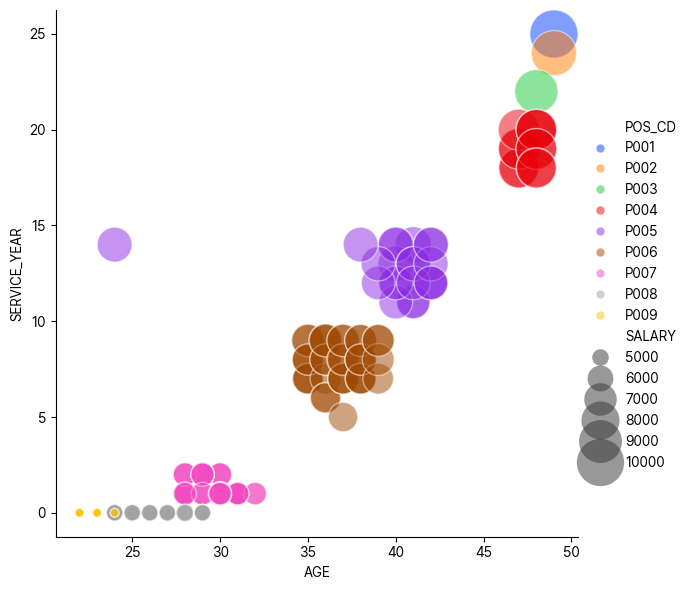

In [312]:
sns.relplot(
    data = hr_info,
    x = 'AGE',
    y = 'SERVICE_YEAR',
    hue = 'POS_CD', # 구분기준은 직위코드
    size = 'SALARY', # 버블 크기를 연봉크기 기준으로
    sizes = (40, 1200),
    alpha = 0.5,
    palette = 'bright',
    height = 6
)

### 3. 히트맵

In [326]:
hr_corr = hr_info[['PERFORMANCE_SCORE', 'SALARY', 'AGE', 'SERVICE_YEAR', 'TRAINING_HOURS']].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


<Axes: >

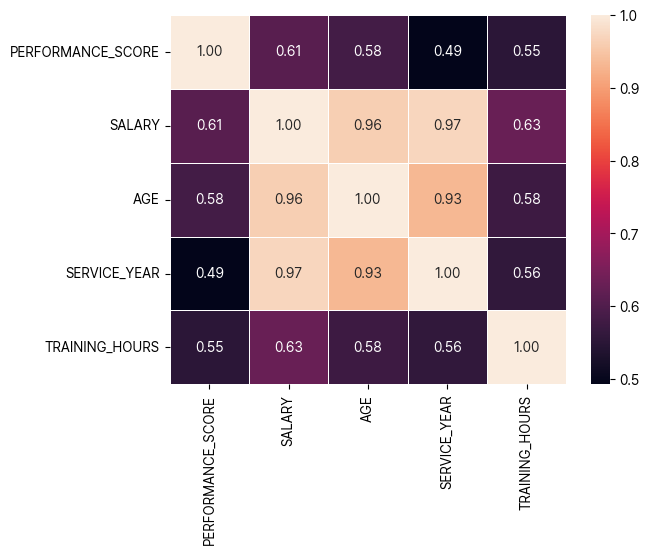

In [332]:
sns.heatmap(hr_corr, annot = True, fmt = '.2f', linewidths = 0.5)